In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

In [2]:
fc_train_path = "F:\ML LEARNING\FaultClassify.csv"
fc_test_path = "F:\ML LEARNING\FaultClassifyTest.csv"

fd_train_path = "F:\ML LEARNING\FaultZoning.csv"
fd_test_path = "F:\ML LEARNING\FaultZoningTest.csv" 

In [3]:
fc_train = pd.read_csv(fc_train_path)
fc_test = pd.read_csv(fc_test_path)

fd_train = pd.read_csv(fd_train_path)
fd_test = pd.read_csv(fd_test_path)

In [4]:
fc_train = shuffle(fc_train,random_state=1)
fc_test = shuffle(fc_test,random_state=1)

fd_train = shuffle(fd_train,random_state=1)
fd_test = shuffle(fd_test,random_state=1)

In [5]:
train = fc_train.sample(frac=1,random_state=0)
test = fc_test.sample(frac=1,random_state=0)

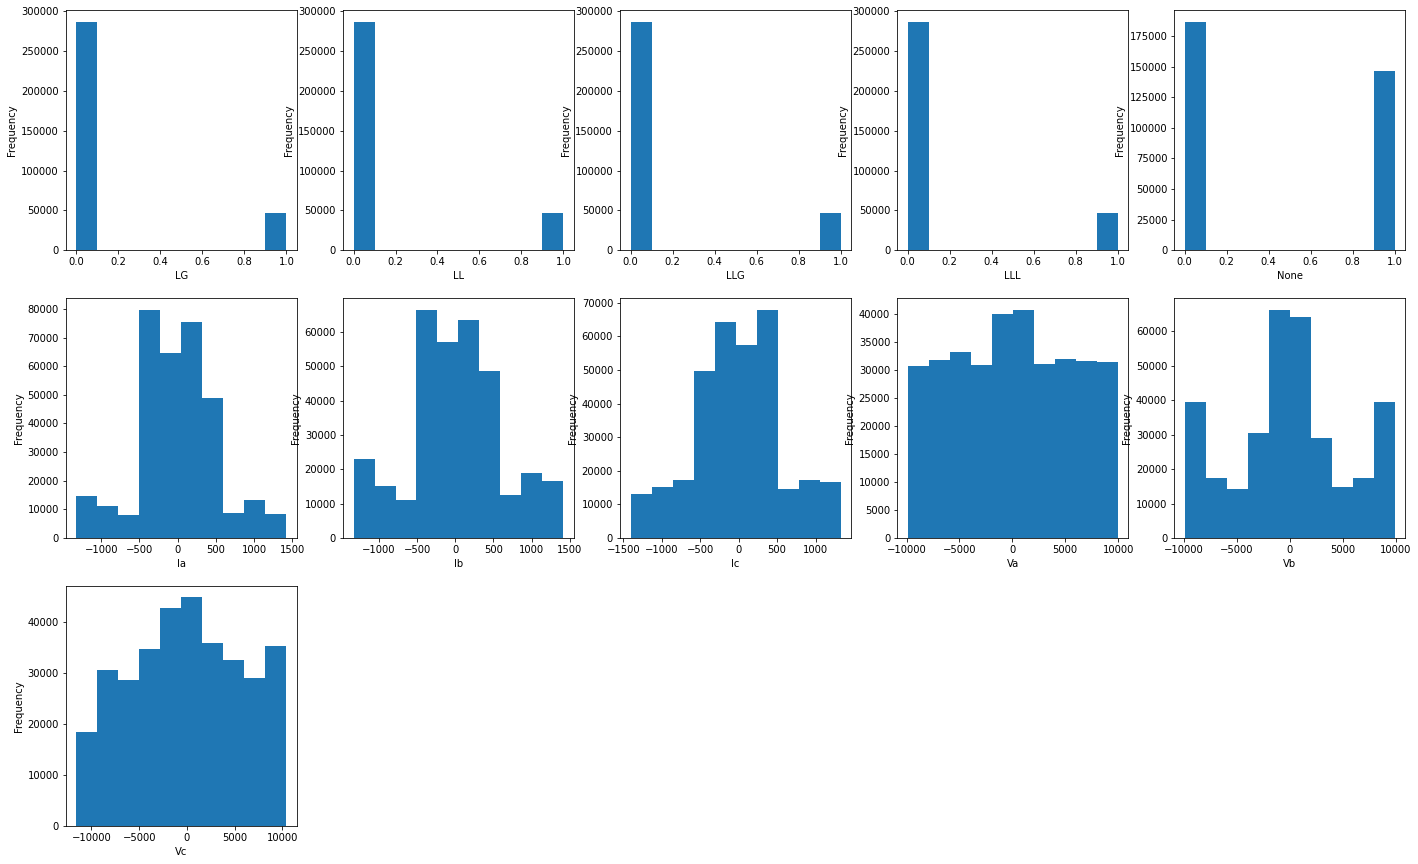

In [6]:
fig = plt.figure(figsize=(24,15))
i = 0
for column in train:
    sub = fig.add_subplot(3,5,i+1)
    sub.set_xlabel(column)
    train[column].plot(kind='hist')
    i = i+1

In [7]:
train.columns

Index(['LG', 'LL', 'LLG', 'LLL', 'None', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'], dtype='object')

In [8]:
target_cols = ['LG', 'LL', 'LLG', 'LLL', 'None']
features = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']

In [9]:
X_train = train[features]
Y_train = train[target_cols]

In [10]:
X_test = test[features]
Y_test = test[target_cols]

In [11]:
accuracy = []
error = []

In [12]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, Y_train)
Y_pred = xgb_model.predict(X_test)
accuracy.append(accuracy_score(Y_test, Y_pred))
error.append(mean_squared_error(Y_test, Y_pred))

In [13]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
Y_pred = dtc.predict(X_test)
accuracy.append(accuracy_score(Y_test, Y_pred))
error.append(mean_squared_error(Y_test, Y_pred))

In [14]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
accuracy.append(accuracy_score(Y_test, Y_pred))
error.append(mean_squared_error(Y_test, Y_pred))

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
accuracy.append(accuracy_score(Y_test, Y_pred))
error.append(mean_squared_error(Y_test, Y_pred))

In [16]:
accuracy

[0.9992530149397012,
 0.9985210295794084,
 0.9993790124197516,
 0.9993790124197516]

In [17]:
error

[0.0002003959920801584,
 0.0005915881682366353,
 0.00017879642407151857,
 0.00017879642407151857]

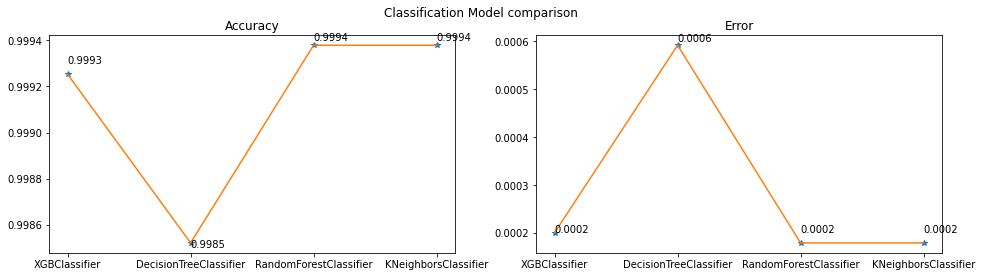

In [18]:
fig,ax = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Classification Model comparison')
x = [0,1,2,3]

ax[0].set_xticks([0,1,2,3])
ax[0].set_xticklabels(['XGBClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier','KNeighborsClassifier'])
ax[0].set_title('Accuracy')
ax[0].plot(accuracy,'*')
ax[0].plot(accuracy)
for i in range(len(accuracy)):
    accuracy[i] = round(accuracy[i],4)
for i,j in zip(x,accuracy):
    ax[0].annotate(str(j),xy=(i,j))

ax[1].set_xticks([0,1,2,3])
ax[1].set_xticklabels(['XGBClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier','KNeighborsClassifier'])
ax[1].set_title('Error')
ax[1].plot(error,'*')
ax[1].plot(error)
for i in range(len(error)):
    error[i] = round(error[i],4)
for i,j in zip(x,error):
    ax[1].annotate(str(j),xy=(i,j))